In [ ]:
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/new-plant-diseases-dataset


In [8]:
import torch
from torchvision.datasets import ImageFolder
from torchvision import transforms
import matplotlib.pyplot as plt
img_transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor()
])
trn_path = r"/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
train_data = ImageFolder(trn_path,transform=img_transform)

val_path = r"/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
val_data = ImageFolder(val_path,transform=img_transform)

In [9]:
plant_ref = {}
for i, class_label in enumerate(train_data.classes):
  plant_ref[i] = class_label

In [10]:
plant_ref

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [11]:
import json
with open('Plant_ref.json','w') as f:
  json.dump(plant_ref,f)

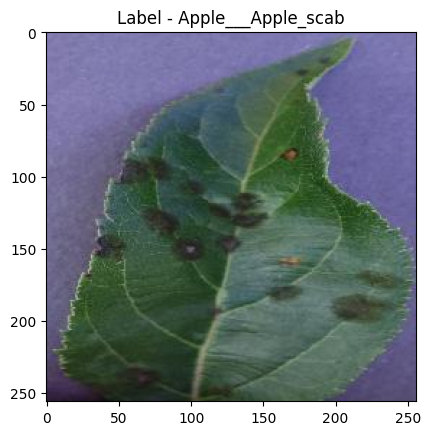

In [ ]:
img, label = train_data[1]
img = img.permute(1,2,0)
plt.imshow(img)
plt.title(f"Label - {plant_ref[label]}")
plt.show()

In [ ]:
from collections import Counter
train_labels = [train_data.targets[i] for i in range(len(train_data))]
val_labels = [val_data.targets[i] for i in range(len(val_data))]

print("Train label counts:", Counter(train_labels))
print("Validation label counts:", Counter(val_labels))

Train label counts: Counter({24: 2022, 0: 2016, 15: 2010, 3: 2008, 19: 1988, 1: 1987, 35: 1961, 20: 1939, 21: 1939, 37: 1926, 12: 1920, 29: 1920, 18: 1913, 9: 1908, 8: 1907, 11: 1888, 31: 1882, 10: 1859, 30: 1851, 16: 1838, 34: 1827, 6: 1826, 22: 1824, 27: 1824, 4: 1816, 36: 1790, 23: 1781, 26: 1774, 2: 1760, 32: 1745, 33: 1741, 25: 1736, 17: 1728, 13: 1722, 28: 1702, 14: 1692, 5: 1683, 7: 1642})
Validation label counts: Counter({24: 505, 0: 504, 15: 503, 3: 502, 1: 497, 19: 497, 35: 490, 20: 485, 21: 485, 37: 481, 12: 480, 29: 480, 18: 478, 8: 477, 9: 477, 11: 472, 31: 470, 10: 465, 30: 463, 16: 459, 34: 457, 6: 456, 22: 456, 27: 456, 4: 454, 36: 448, 23: 445, 26: 444, 2: 440, 32: 436, 33: 435, 25: 434, 17: 432, 13: 430, 28: 425, 14: 423, 5: 421, 7: 410})


In [ ]:
from torch import nn, optim
class PlantDisease(nn.Module):
  def __init__(self,num_class):
    super(PlantDisease,self).__init__()

    self.conv_block = nn.Sequential(
      nn.Conv2d(3, 32, kernel_size=3, padding=1),
      nn.BatchNorm2d(32),
      nn.ReLU(),
      nn.MaxPool2d(2),

      nn.Conv2d(32, 64, kernel_size=3, padding=1),
      nn.BatchNorm2d(64),
      nn.ReLU(),
      nn.MaxPool2d(2),

      nn.Conv2d(64, 128, kernel_size=3, padding=1),
      nn.BatchNorm2d(128),
      nn.ReLU(),
      nn.MaxPool2d(2),

      nn.Conv2d(128, 256, kernel_size=3, padding=1),
      nn.BatchNorm2d(256),
      nn.ReLU(),
      nn.MaxPool2d(2)
    )

    self.fc = nn.Sequential(
      nn.Flatten(),
      nn.Linear(256 * 16 * 16, 1024),
      nn.ReLU(),
      nn.Dropout(0.3),
      nn.Linear(1024, 512),
      nn.ReLU(),
      nn.Dropout(0.3),
      nn.Linear(512, num_class)
    )

  def forward(self, x):
    x = self.conv_block(x)
    x = self.fc(x)
    return x

In [ ]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_data,batch_size=32,shuffle=True)
val_loader = DataLoader(val_data,batch_size=32,shuffle=True)

In [ ]:
num_classes = len(plant_ref)
plant_model = PlantDisease(num_classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
plant_model.to(device)
optimizer = optim.Adam(plant_model.parameters(),lr=0.001)
criterion = nn.CrossEntropyLoss()
epochs = 10
for epoch in range(1,epochs+1):
  plant_model.train()
  avg_loss = []
  for x, y in train_loader:
    x, y = x.to(device), y.to(device)
    optimizer.zero_grad()
    output = plant_model(x)
    loss = criterion(output,y)
    loss.backward()
    optimizer.step()
    avg_loss.append(loss.item())
  print(f"Epoch {epoch}: Loss - {sum(avg_loss)/len(avg_loss):.4f}")



Epoch 1: Loss - 1.7927
Epoch 2: Loss - 0.9151
Epoch 3: Loss - 0.6259
Epoch 4: Loss - 0.4678
Epoch 5: Loss - 0.3620
Epoch 6: Loss - 0.2911
Epoch 7: Loss - 0.2403
Epoch 8: Loss - 0.1994
Epoch 9: Loss - 0.1759
Epoch 10: Loss - 0.1502


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
plant_model.eval()
y_true, y_pred = [], []
with torch.no_grad():
  for x, y in val_loader:
    x, y = x.to(device), y.to(device)
    output = plant_model(x)
    preds = torch.argmax(output,dim=1)
    y_true.extend(y.cpu().numpy())
    y_pred.extend(preds.cpu().numpy())
print("Accuracy",accuracy_score(y_true,y_pred))
print("Precision",precision_score(y_true,y_pred,average='micro'))
print("Recall",recall_score(y_true,y_pred,average='micro'))
print("F1",f1_score(y_true,y_pred,average='micro'))

Accuracy 0.9563510129751878
Precision 0.9563510129751878
Recall 0.9563510129751878
F1 0.9563510129751878


In [ ]:
# Save the model
torch.save(plant_model.state_dict(),"Plant_disease.pth")

In [41]:
with open(r"/content/Plant_ref.json") as f:
  plant_ref = json.load(f)
plant_ref

str

# Streamlit part

In [1]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [53]:
%%writefile Plant_disease_prediction.py
import streamlit as st
import torch
from torch import nn
from torchvision import transforms
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import time
import json

st.title(":green[PLANT DISEASE DETECTION]")

with open(r"/content/Plant_ref.json") as f:
  plant_ref = json.load(f)
plant_ref = {int(k):v for k,v in plant_ref.items()}

img_transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor()
])

class PlantDisease(nn.Module):
  def __init__(self,num_class):
    super(PlantDisease,self).__init__()

    self.conv_block = nn.Sequential(
      nn.Conv2d(3, 32, kernel_size=3, padding=1),
      nn.BatchNorm2d(32),
      nn.ReLU(),
      nn.MaxPool2d(2),

      nn.Conv2d(32, 64, kernel_size=3, padding=1),
      nn.BatchNorm2d(64),
      nn.ReLU(),
      nn.MaxPool2d(2),

      nn.Conv2d(64, 128, kernel_size=3, padding=1),
      nn.BatchNorm2d(128),
      nn.ReLU(),
      nn.MaxPool2d(2),

      nn.Conv2d(128, 256, kernel_size=3, padding=1),
      nn.BatchNorm2d(256),
      nn.ReLU(),
      nn.MaxPool2d(2)
    )

    self.fc = nn.Sequential(
      nn.Flatten(),
      nn.Linear(256 * 16 * 16, 1024),
      nn.ReLU(),
      nn.Dropout(0.3),
      nn.Linear(1024, 512),
      nn.ReLU(),
      nn.Dropout(0.3),
      nn.Linear(512, num_class)
    )

  def forward(self, x):
    x = self.conv_block(x)
    x = self.fc(x)
    return x

num_classes = len(plant_ref)
plant_detect = PlantDisease(num_classes)
plant_detect.load_state_dict(torch.load(r"/content/Plant_disease.pth",map_location="cpu"))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
plant_detect.to(device)
image_plt = st.file_uploader("Upload the image",type=["jpg", "jpeg", "png"])
if image_plt is not None:
  if st.button("Display image and Disease Type"):
    image_plt_show = Image.open(image_plt).convert("RGB")
    image_plt_show = img_transform(image_plt_show)
    fig, ax = plt.subplots()
    image_plt_show = image_plt_show.permute(1,2,0)
    ax.imshow(image_plt_show)
    ax.axis('off')
    st.pyplot(fig)

    plant_detect.eval()
    image_plt_ev = Image.open(image_plt).convert("RGB")
    image_plt_ev = img_transform(image_plt_ev)
    image_plt_ev = image_plt_ev.unsqueeze(0)
    with torch.no_grad():
      output = plant_detect(image_plt_ev.to(device))
      disease = torch.argmax(output,dim=1).cpu().numpy()
    time.sleep(10)
    st.write("Plant disease type - ",plant_ref[disease.item()])

Overwriting Plant_disease_prediction.py


In [3]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋
added 22 packages in 3s
⠙
⠙3 packages are looking for funding
⠙  run `npm fund` for details
⠙

In [54]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.125.76.152


In [55]:
!streamlit run /content/Plant_disease_prediction.py &>/content/logs.txt &

In [56]:
!npx localtunnel --port 8501

⠙your url is: https://few-nights-divide.loca.lt
^C
